In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
f = 'stroke_data.csv'
df = pd.read_csv(f)

# Data Preview

In [10]:
#Data preview
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From here we can see there are missing values in BMI

In [13]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


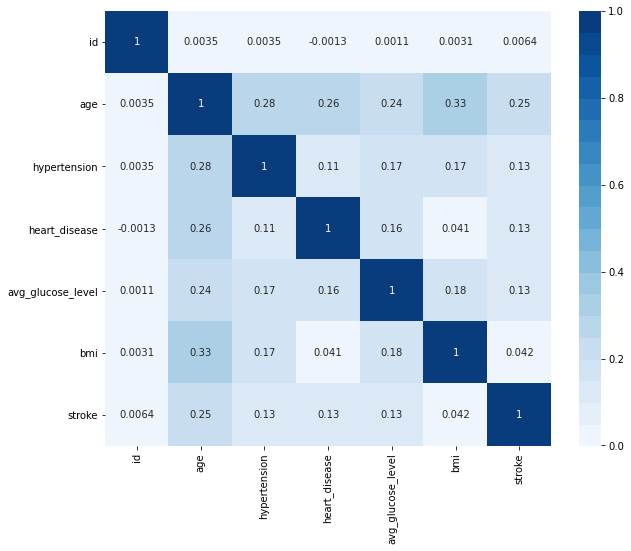

In [15]:
#Dropping useless columns
# To check useful columns we can use correlation analysis to see which columns have high correlation
import seaborn as sns
plt.figure(figsize = (10,8))
dataplot = sns.heatmap(df.corr(), cmap=sns.color_palette("Blues",20), annot = True)


id has the lowest correlation with other columns but its an identifier in this case


# Checking for duplicates


In [11]:
df.duplicated()# There are no duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

# Checking for missing values


In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
df.isnull().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

Since its only one column with missing data that accounts for only 3% we can drop it


In [18]:
df1  = df.dropna(axis = 0) 
#df1 - data set after removing all missing values
print(df1.shape)
print(df.shape)

(4909, 12)
(5110, 12)


The difference in shape shows the null data points have been removed

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [20]:
# We can decide to use Imputation to fill in the null values
#We will use df2 for this case
df2 = df

In [21]:
df2['bmi'] = df2['bmi'].fillna(df2['bmi'].mean()) # In this case we filled the missing values with the mean
df2
#df2 - dataset after replacing all missing values with the mean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [20]:
df1.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# To check for outliers

<AxesSubplot:>

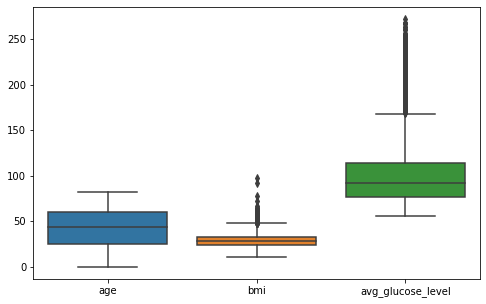

In [22]:
# Checking using boxplot
import seaborn as sns

plt.figure(figsize = (8,5))
columns = ['age','bmi','avg_glucose_level']
sns.boxplot(data=df1[columns])
#We should check for outliers for all columns that will be used

<AxesSubplot:>

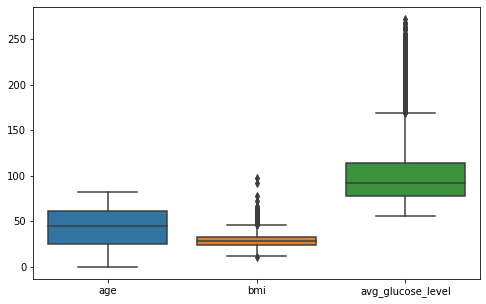

In [23]:
# for df2
import seaborn as sns
plt.figure(figsize = (8,5))
columns = ['age','bmi','avg_glucose_level']
sns.boxplot(data=df2[columns])

Text(0, 0.5, 'value')

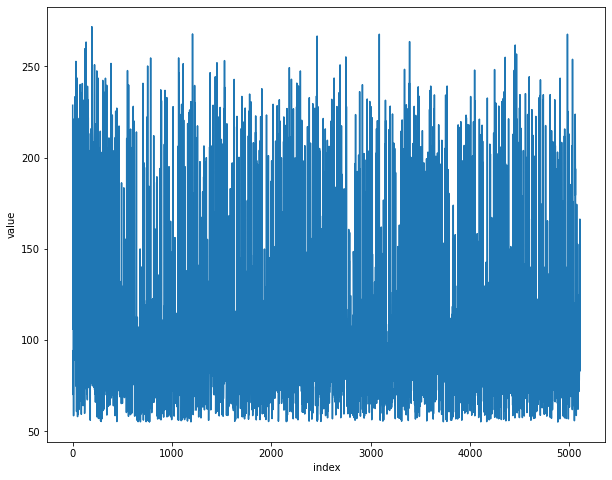

In [24]:
#Detecting outliers using lineplot
plt.figure(figsize=(10,8))
df1['avg_glucose_level'].plot()
plt.xlabel('index')
plt.ylabel('value')


In [25]:
#From the boxplot, both BMI and avg_glucose_level have outliers
df3 = df1

In [29]:
#Removing outliers using interquartile range
def handle_outliers(column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df3[column] = df1[column].clip(lower=lower_bound, upper=upper_bound) # .clip() is used to limit values to a specified range
print(df3.shape)
#df3 dataset after all outliers are removed

(4909, 12)
(4909, 12)


# Identify Demographic Trends
Explore and analyze demographic factors such as age, gender, marital status, and residence type to identify any trends or patterns related to strokes.


In [30]:
df3.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [31]:
df3.mean()

id                   37064.313506
age                     42.865374
hypertension             0.091872
heart_disease            0.049501
avg_glucose_level      105.305150
bmi                     28.893237
stroke                   0.042575
dtype: float64

In [32]:
df3.mode()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,77,Female,57.0,0.0,0.0,Yes,Private,Urban,93.88,28.7,never smoked,0.0
1,84,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,72911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4905,72914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4906,72915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4907,72918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df3.median()

id                   37608.00
age                     44.00
hypertension             0.00
heart_disease            0.00
avg_glucose_level       91.68
bmi                     28.10
stroke                   0.00
dtype: float64

In [34]:
df3.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Explore and analyze demographic factors such as age, gender, marital status, and residence type to identify any trends or patterns related to strokes.

The percentage of people who were married is 65.27%
The percentage of people who were not married is 34.73%


<AxesSubplot:xlabel='ever_married', ylabel='Count'>

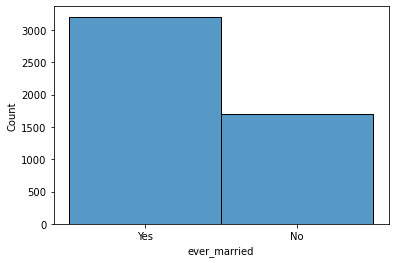

In [36]:
married_status_married = df3[df3['ever_married'] == 'Yes'].shape[0]
married_status_married
total = len(df3['ever_married'])
percentage_of_married = (married_status_married/total)*100
print(f"The percentage of people who were married is {percentage_of_married:.2f}%")

married_status_single = df3[df3['ever_married'] == 'No'].shape[0]
married_status_single
total = len(df3['ever_married'])
percentage_of_single = (married_status_single/total)*100
print(f"The percentage of people who were not married is {percentage_of_single:.2f}%")


sns.histplot(x='ever_married', data=df3, stat='count', kde=False)

In [35]:
df3.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


The percentage of people who formely smoked 17.05%
The percentage of people who currently smoke15.01%
The percentage of people who never smoked is 15.01%
The rest are unkown as shown by the graph below


<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

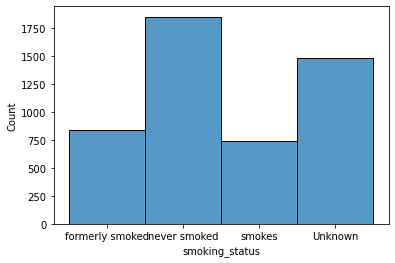

In [38]:
smoking_status_formely = df3[df3['smoking_status'] == 'formerly smoked'].shape[0]
smoking_status_formely
total = len(df3['smoking_status'])
percentage_of_formely_smoked = (smoking_status_formely/total)*100
print(f"The percentage of people who formely smoked {percentage_of_formely_smoked:.2f}%")

smoking_status_smokes = df3[df3['smoking_status'] == 'smokes'].shape[0]
smoking_status_smokes
total = len(df3['smoking_status'])
percentage_of_smoking = (smoking_status_smokes/total)*100
print(f"The percentage of people who currently smoke{percentage_of_smoking:.2f}%")

smoking_status_never_smoked = df3[df3['smoking_status'] == 'smokes'].shape[0]
smoking_status_never_smoked
total = len(df3['smoking_status'])
percentage_of_never_smoked = (smoking_status_smokes/total)*100
print(f"The percentage of people who never smoked is {percentage_of_never_smoked:.2f}%")
print("The rest are unkown as shown by the graph below")


sns.histplot(x='smoking_status', data=df3, stat='count', kde=False)

The percentage of people living in Urban story with stroke is 50.72%
The percentage of people living in Rural story with stroke is 49.28%


<AxesSubplot:xlabel='Residence_type', ylabel='Count'>

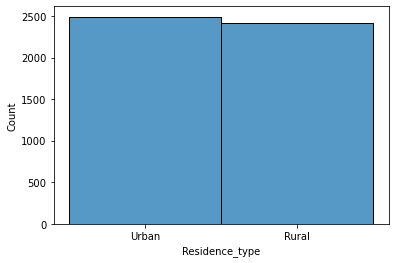

In [39]:
residence_type_urban = df3[df3['Residence_type'] == 'Urban'].shape[0]
residence_type_urban
total = len(df3['Residence_type'])
percentage_of_urban = (residence_type_urban/total)*100
print(f"The percentage of people living in Urban story with stroke is {percentage_of_urban:.2f}%")

residence_type_rural = df3[df3['Residence_type'] == 'Rural'].shape[0]
residence_type_rural
total = len(df3['Residence_type'])
percentage_of_rural = (residence_type_rural/total)*100
print(f"The percentage of people living in Rural story with stroke is {percentage_of_rural:.2f}%")


sns.histplot(x='Residence_type', data=df3, stat='count', kde=False)

The percentage of men with stroke is 40.97%
The percentage of women with stroke is 59.01%


<AxesSubplot:xlabel='gender', ylabel='Count'>

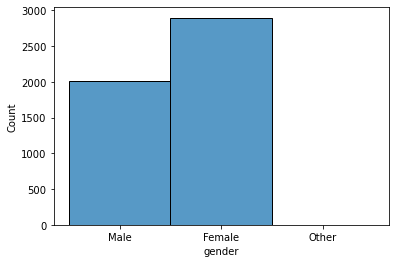

In [40]:
male_count = df3[df3['gender'] == 'Male'].shape[0]
male_count
total = len(df3['gender'])
percentage_of_male = (male_count/total)*100

female_count = df3[df3['gender'] == 'Female'].shape[0]
female_count
total = len(df3['gender'])
percentage_of_female = (female_count/total)*100


print(f"The percentage of men with stroke is {percentage_of_male:.2f}%")
print(f"The percentage of women with stroke is {percentage_of_female:.2f}%")

sns.histplot(x='gender', data=df3, stat='count', kde=False)

<AxesSubplot:xlabel='age', ylabel='Count'>

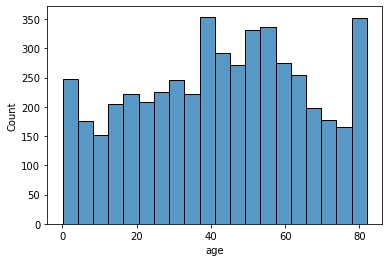

In [41]:
# sns.histplot(x='age', data = df3)
sns.histplot(x='age', data=df3, stat='count', kde=False)

In [41]:
df3.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Checking Correlation between all numerical variables

Text(0.5, 1.0, 'Correlation Heatmap')

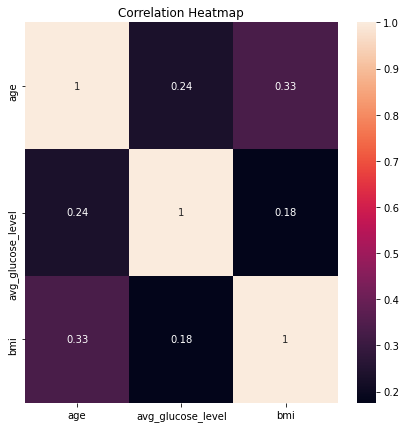

In [44]:
#To check correlation between all the numerical variables
fig, ax = plt.subplots(figsize=(7, 7))
heatmap = sns.heatmap(df3[['age', 'avg_glucose_level', 'bmi']].corr(), vmax=1, annot=True,ax = ax)
heatmap.set_title('Correlation Heatmap')

There is a positive correlation between age and BMI. Overall, all three variables are favorably associated with one another. However, there is a larger link between age and body mass index.

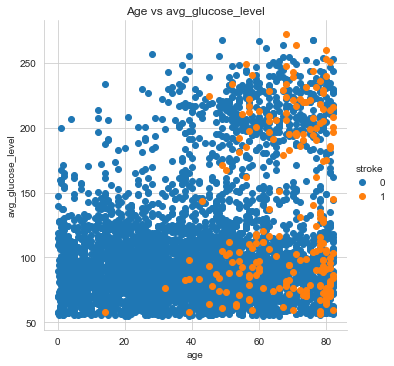

In [45]:
#To check age vs glucose level and chances of getting stroke
sns.set_style("whitegrid")
sns.FacetGrid(df3, hue="stroke", height=5).map(plt.scatter, "age", "avg_glucose_level").add_legend()
plt.title('Age vs avg_glucose_level')
plt.show()

More age raises the likelihood of having a stroke. Almost all of the yellow patches appear after 40. However, it is worth noting that many of the blue patches are still there beyond 40. The age variable will be useful in developing a model.

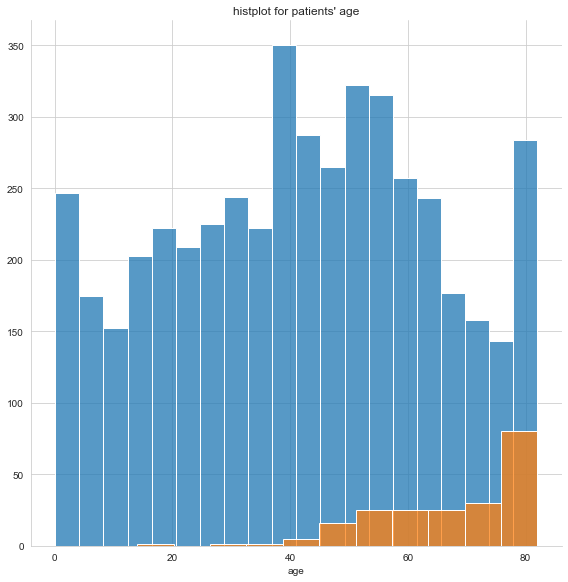

In [47]:
#To check relationship between age and stroke
sns.FacetGrid(df3, hue="stroke", height = 8).map(sns.histplot, "age")
plt.title("histplot for patients' age")
plt.show()

The more the age, the higher the chances of getting stroke

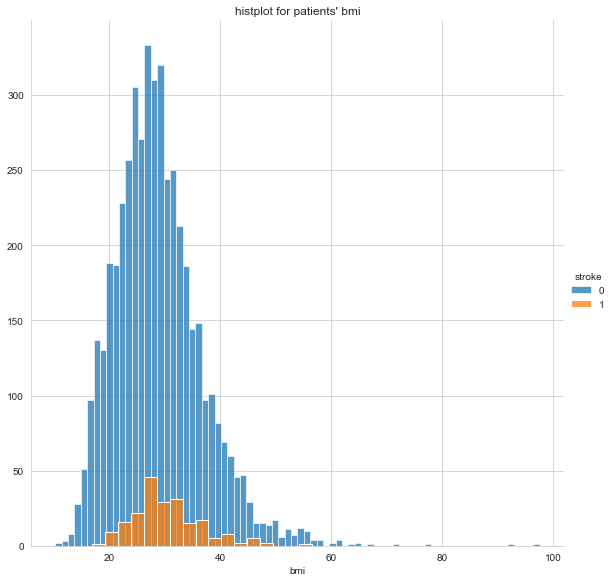

In [48]:
#Relationship between BMI and stroke
sns.FacetGrid(df3, hue="stroke", height = 8).map(sns.histplot, "bmi").add_legend()
plt.title("histplot for patients' bmi")
plt.show()

There is a very low correlation between BMI and stroke. BMI alone cannot determine the likelihood of one getting stroke.

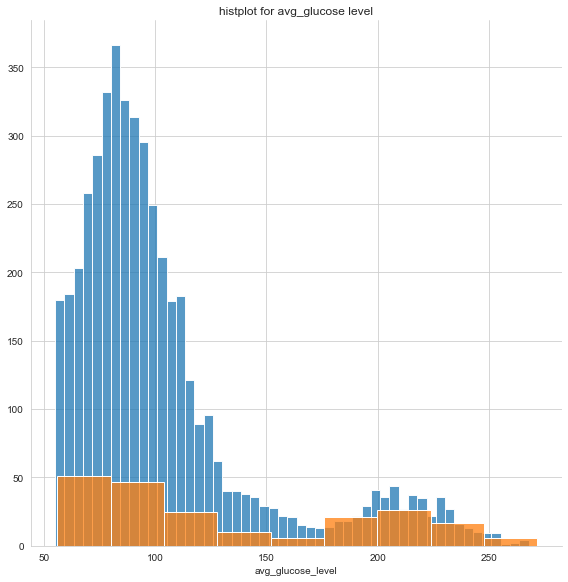

In [49]:
#Relationship between Glucose levels and stroke
sns.FacetGrid(df3, hue="stroke", height = 8).map(sns.histplot, "avg_glucose_level")
plt.title("histplot for avg_glucose level")
plt.show()

There is a very low correlation between the average glucose level and stroke. The average Glucose level alone cannot aid in determining the likelihood of one getting stroke.

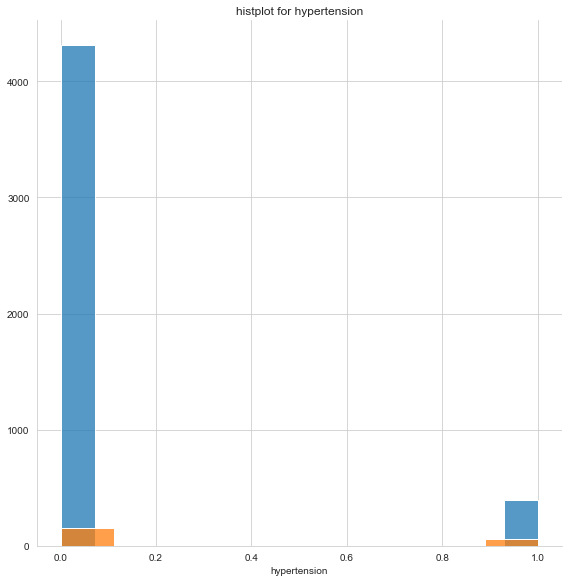

In [50]:
#Relationship between hypertension levels and stroke
sns.FacetGrid(df3, hue="stroke", height = 8).map(sns.histplot, "hypertension")
plt.title("histplot for hypertension")
plt.show()

There is a low correlation between Hypertension and stroke. Hypertension alone cannot determine the likelihood of one getting stroke.

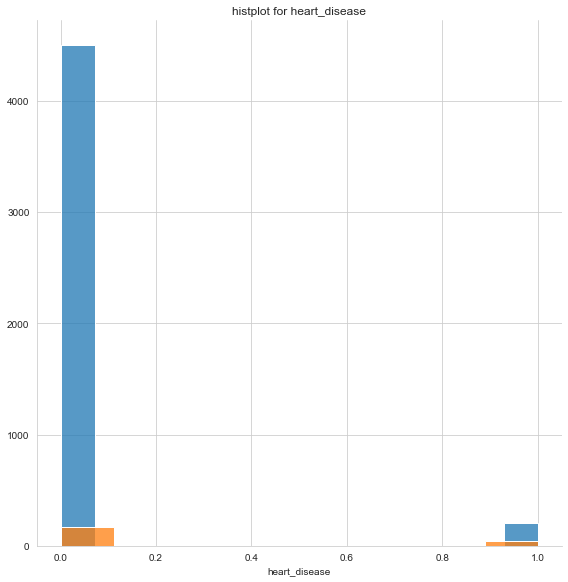

In [51]:
#Relationship between Heart Disease and stroke
sns.FacetGrid(df3, hue="stroke", height = 8).map(sns.histplot, "heart_disease")
plt.title("histplot for heart_disease")
plt.show()

There is a low correlation between Heart disease and stroke thus it can't solely determine the likelihood of one getting stroke.

In [52]:
#Overall data visualization to assess metrics(re-loading data)
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


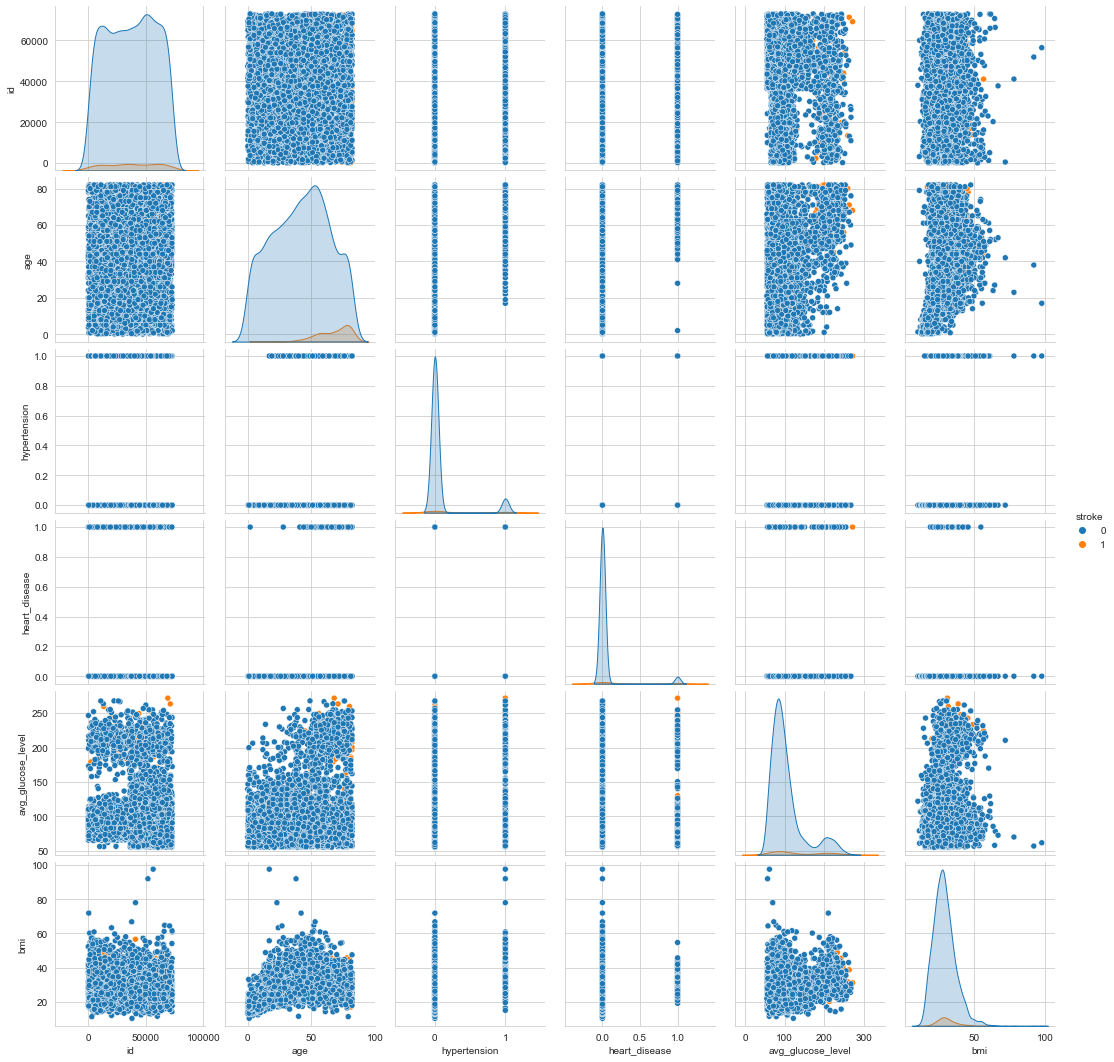

In [53]:
#Overall data visualization to assess metrics
sns.pairplot(df3, hue='stroke')

In [54]:
# Data preprocessing
X = df3[['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = df3['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Data preprocessing
X = df3[['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = df3['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Explore Correlations
Conduct correlation analysis to identify relationships between different health conditions (hypertension, heart disease) and understand their potential collective influence on strokes.


In [58]:
import pandas as pd

# The analysis is of hypertension, hear_disease and how they affect stroke
health_conditions = df3[['hypertension', 'heart_disease', 'stroke']]

# Calculating correlations
correlation_matrix = health_conditions.corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               hypertension  heart_disease    stroke
hypertension       1.000000       0.115991  0.142515
heart_disease      0.115991       1.000000  0.137938
stroke             0.142515       0.137938  1.000000


In [59]:
df3.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

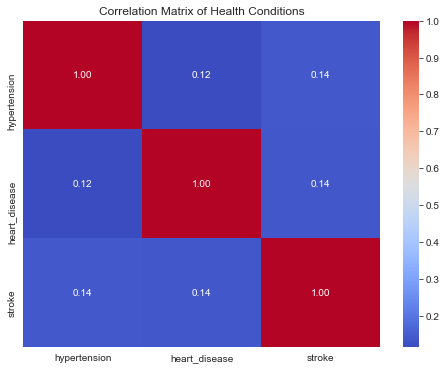

In [60]:
# Visualization of the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Health Conditions")
plt.show()

# Analysis of Gender, Work Type, and Smoking Status with respect to Strokes

In [69]:
# Distribution analysis
gender_stroke = pd.crosstab(df3['gender'], df3['stroke'])
work_type_stroke = pd.crosstab(df3['work_type'], df3['stroke'])
smoking_status_stroke = pd.crosstab(df3['smoking_status'], df3['stroke'])

# Visualizing the distributions
# plt.figure(figsize=(15, 5))
print("Gender stroke")
print(gender_stroke)
print()
print("Work type stroke")
print(work_type_stroke)
print()
print("Smoking status Stroke")
print(smoking_status_stroke)

Gender stroke
stroke     0    1
gender           
Female  2777  120
Male    1922   89
Other      1    0

Work type stroke
stroke            0    1
work_type               
Govt_job        602   28
Never_worked     22    0
Private        2684  127
Self-employed   722   53
children        670    1

Smoking status Stroke
stroke              0   1
smoking_status           
Unknown          1454  29
formerly smoked   780  57
never smoked     1768  84
smokes            698  39


Text(0.5, 1.0, 'Gender vs Stroke')

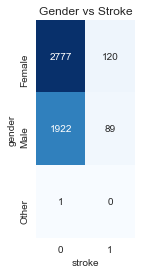

In [70]:
plt.subplot(1, 3, 1)
sns.heatmap(gender_stroke, annot=True, cmap='Blues', fmt="d", cbar=False)
plt.title("Gender vs Stroke")

Text(0.5, 1.0, 'Work Type vs Stroke')

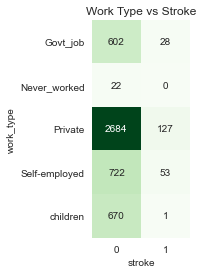

In [71]:
plt.subplot(1, 3, 2)
sns.heatmap(work_type_stroke, annot=True, cmap='Greens', fmt="d", cbar=False)
plt.title("Work Type vs Stroke")

Text(0.5, 1.0, 'Smoking Status vs Stroke')

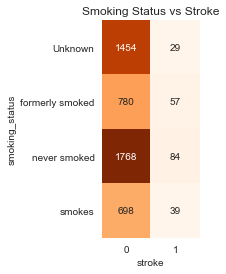

In [72]:
plt.subplot(1, 3, 3)
sns.heatmap(smoking_status_stroke, annot=True, cmap='Oranges', fmt="d", cbar=False)
plt.title("Smoking Status vs Stroke")

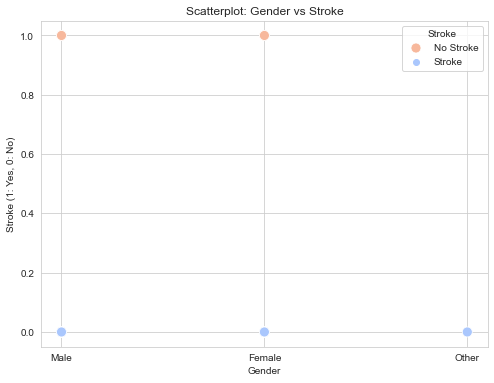

In [73]:
# Scatterplot for Gender vs Stroke
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gender', y='stroke', data=df3, hue='stroke', palette='coolwarm', s=100)
plt.title("Scatterplot: Gender vs Stroke")
plt.xlabel("Gender")
plt.ylabel("Stroke (1: Yes, 0: No)")
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

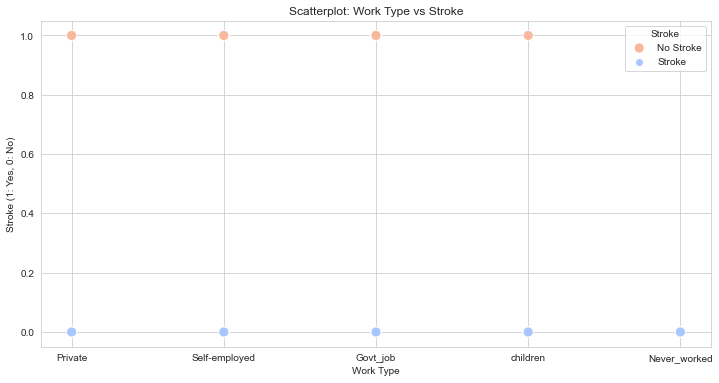

In [74]:
# Scatterplot for Work Type vs Stroke
plt.figure(figsize=(12, 6))
sns.scatterplot(x='work_type', y='stroke', data=df3, hue='stroke', palette='coolwarm', s=100)
plt.title("Scatterplot: Work Type vs Stroke")
plt.xlabel("Work Type")
plt.ylabel("Stroke (1: Yes, 0: No)")
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

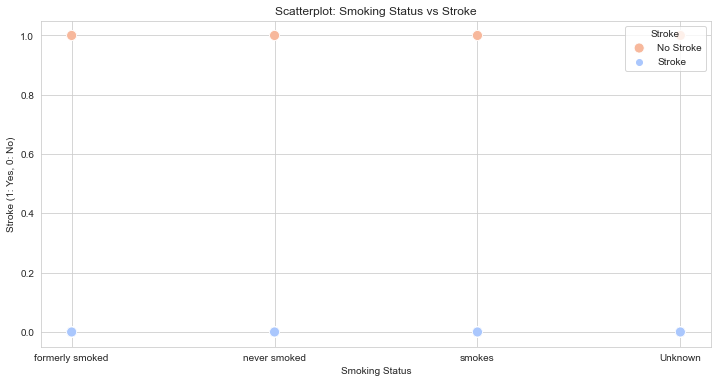

In [75]:
# Scatterplot for Smoking Status vs Stroke
plt.figure(figsize=(12, 6))
sns.scatterplot(x='smoking_status', y='stroke', data=df3, hue='stroke', palette='coolwarm', s=100)
plt.title("Scatterplot: Smoking Status vs Stroke")
plt.xlabel("Smoking Status")
plt.ylabel("Stroke (1: Yes, 0: No)")
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

In [76]:
# Groupby Gender and calculate the mean stroke rate
df3.groupby('gender').sum('stroke')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,107035986,125839.32,251,100,299346.76,84203.5,120
Male,74856573,84560.80,200,143,217452.89,57611.0,89
Other,56156,26.00,0,0,143.33,22.4,0
